<a href="https://colab.research.google.com/github/ARSHITHbabu/Q-Learning-Treasure-Quest/blob/main/Q-Learning-Treasure-Quest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Cell 1: Environment Setup and Import Libraries :***

This cell includes all the environment parameters, constants, and helper functions.

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define environment parameters
GRID_SIZE = 10
START_POS_1 = (9, 0)
START_POS_2 = (9, 0)
TREASURE_POS = (0, 9)
TRAPS = [(4, 4), (5, 5), (3, 7), (6, 2), (1, 8)]

ACTIONS = ['up', 'down', 'left', 'right']
ACTION_MAPPING = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

ALPHA = 0.1
GAMMA = 0.9
EPSILON = 0.1
EPISODES = 1000
MAX_STEPS = 50

q_table_1 = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))
q_table_2 = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

def get_reward(state):
    if state == TREASURE_POS:
        return 100
    elif state in TRAPS:
        return -50
    else:
        return -1

def is_valid(pos):
    return 0 <= pos[0] < GRID_SIZE and 0 <= pos[1] < GRID_SIZE

def next_state(state, action):
    move = ACTION_MAPPING[action]
    new_state = (state[0] + move[0], state[1] + move[1])
    return new_state if is_valid(new_state) else state


***Cell 2: Q-learning Algorithm and Training Process :***

This cell contains the Q-learning function, the training loop, and metrics collection for both agents.

In [16]:
def q_learning_competition():
    metrics = {1: {'total_rewards': 0, 'total_steps': 0, 'traps_triggered': 0},
               2: {'total_rewards': 0, 'total_steps': 0, 'traps_triggered': 0}}

    for episode in range(EPISODES):
        state_1, state_2 = START_POS_1, START_POS_2
        episode_rewards_1, episode_rewards_2 = 0, 0
        episode_steps_1, episode_steps_2 = 0, 0
        episode_traps_1, episode_traps_2 = 0, 0

        for step in range(MAX_STEPS):
            # Agent 1's turn
            action_idx_1 = random.choice(range(len(ACTIONS))) if random.uniform(0, 1) < EPSILON else np.argmax(q_table_1[state_1[0], state_1[1]])
            action_1 = ACTIONS[action_idx_1]
            next_pos_1 = next_state(state_1, action_1)
            reward_1 = get_reward(next_pos_1)
            if next_pos_1 in TRAPS:
                episode_traps_1 += 1
            episode_rewards_1 += reward_1
            episode_steps_1 += 1
            best_next_action_1 = np.argmax(q_table_1[next_pos_1[0], next_pos_1[1]])
            q_table_1[state_1[0], state_1[1], action_idx_1] += ALPHA * (reward_1 + GAMMA * q_table_1[next_pos_1[0], next_pos_1[1], best_next_action_1] - q_table_1[state_1[0], state_1[1], action_idx_1])
            state_1 = next_pos_1

            # Agent 2's turn
            action_idx_2 = random.choice(range(len(ACTIONS))) if random.uniform(0, 1) < EPSILON else np.argmax(q_table_2[state_2[0], state_2[1]])
            action_2 = ACTIONS[action_idx_2]
            next_pos_2 = next_state(state_2, action_2)
            reward_2 = get_reward(next_pos_2)
            if next_pos_2 in TRAPS:
                episode_traps_2 += 1
            episode_rewards_2 += reward_2
            episode_steps_2 += 1
            best_next_action_2 = np.argmax(q_table_2[next_pos_2[0], next_pos_2[1]])
            q_table_2[state_2[0], state_2[1], action_idx_2] += ALPHA * (reward_2 + GAMMA * q_table_2[next_pos_2[0], next_pos_2[1], best_next_action_2] - q_table_2[state_2[0], state_2[1], action_idx_2])
            state_2 = next_pos_2

        metrics[1]['total_rewards'] += episode_rewards_1
        metrics[1]['total_steps'] += episode_steps_1
        metrics[1]['traps_triggered'] += episode_traps_1
        metrics[2]['total_rewards'] += episode_rewards_2
        metrics[2]['total_steps'] += episode_steps_2
        metrics[2]['traps_triggered'] += episode_traps_2

    return metrics[1], metrics[2]

metrics_agent_1, metrics_agent_2 = q_learning_competition()

if metrics_agent_1['total_rewards'] > metrics_agent_2['total_rewards']:
    winner = "Agent 1"
elif metrics_agent_1['total_rewards'] < metrics_agent_2['total_rewards']:
    winner = "Agent 2"
else:
    winner = "Draw"


***Cell 3: Policy Extraction and Path Simulation :***

In this cell, the optimal policy for both agents is extracted and the path simulation is performed.

In [17]:
def get_policy(q_table):
    return np.array([[ACTIONS[np.argmax(q_table[i, j])] for j in range(GRID_SIZE)] for i in range(GRID_SIZE)])

policy_1 = get_policy(q_table_1)
policy_2 = get_policy(q_table_2)

def simulate_competition():
    state_1, state_2 = START_POS_1, START_POS_2
    path_1, path_2 = [state_1], [state_2]

    for step in range(MAX_STEPS):
        action_idx_1 = np.argmax(q_table_1[state_1[0], state_1[1]])
        next_pos_1 = next_state(state_1, ACTIONS[action_idx_1])
        path_1.append(next_pos_1)
        state_1 = next_pos_1
        if state_1 == TREASURE_POS:
            break

        action_idx_2 = np.argmax(q_table_2[state_2[0], state_2[1]])
        next_pos_2 = next_state(state_2, ACTIONS[action_idx_2])
        path_2.append(next_pos_2)
        state_2 = next_pos_2
        if state_2 == TREASURE_POS:
            break

    return path_1, path_2

optimal_path_1, optimal_path_2 = simulate_competition()


***Cell 4: Analytical Dashboard and Path Visualization :***

This cell includes printing the dashboard metrics and plotting the paths of both agents on a grid.

---- Analytical Dashboard ----
Agent 1: Total Rewards: 2304835, Total Steps: 50000, Traps Triggered: 148
Agent 2: Total Rewards: 2273131, Total Steps: 50000, Traps Triggered: 121
Winner: Agent 1
------------------------------


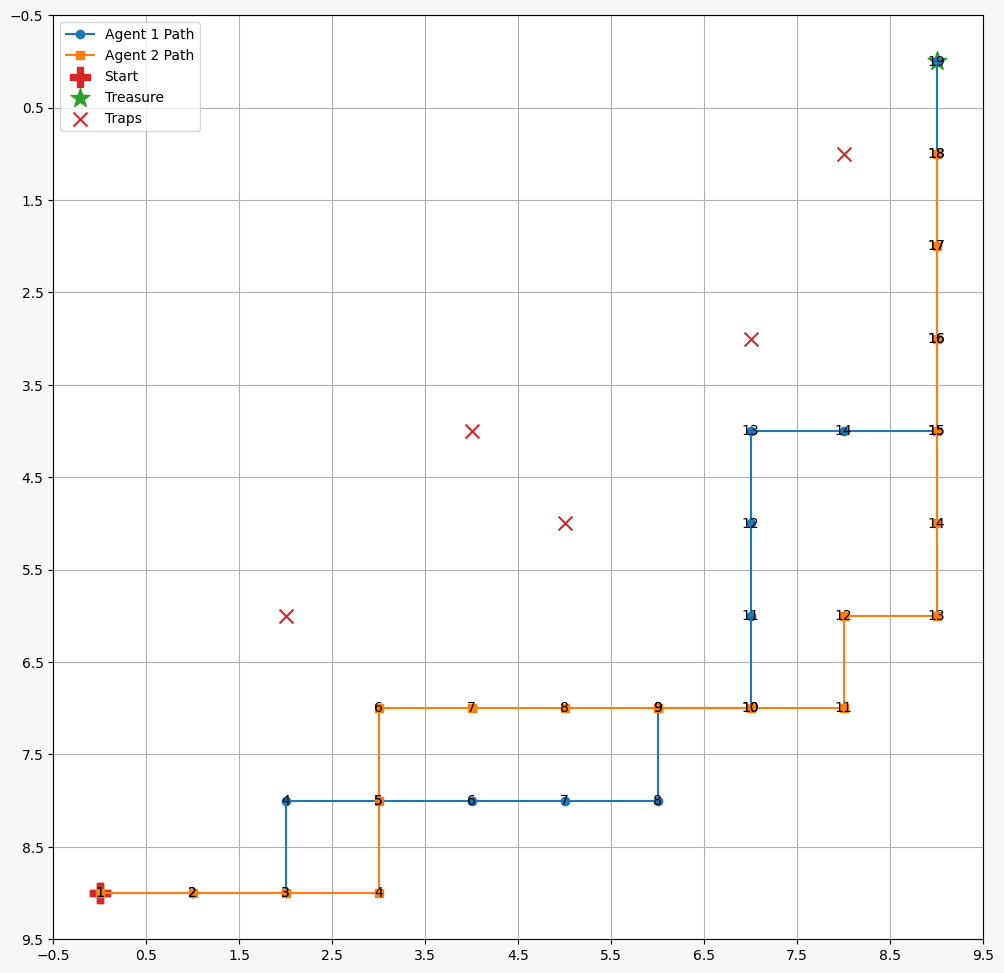

In [18]:
def print_dashboard(metrics_agent_1, metrics_agent_2):
    print("---- Analytical Dashboard ----")
    print(f"Agent 1: Total Rewards: {metrics_agent_1['total_rewards']}, Total Steps: {metrics_agent_1['total_steps']}, Traps Triggered: {metrics_agent_1['traps_triggered']}")
    print(f"Agent 2: Total Rewards: {metrics_agent_2['total_rewards']}, Total Steps: {metrics_agent_2['total_steps']}, Traps Triggered: {metrics_agent_2['traps_triggered']}")
    print(f"Winner: {winner}")
    print("------------------------------")

print_dashboard(metrics_agent_1, metrics_agent_2)

def plot_competition_path_with_matrices(path_1, path_2):
    fig, ax = plt.subplots(figsize=(12, 12), facecolor='#f7f7f7')
    ax.set_xlim(-0.5, GRID_SIZE - 0.5)
    ax.set_ylim(-0.5, GRID_SIZE - 0.5)

    colors = ['#1f77b4', '#ff7f0e']
    markers = ['o', 's']

    for i, path in enumerate([path_1, path_2]):
        x, y = zip(*path)
        ax.plot(y, x, marker=markers[i], color=colors[i], label=f"Agent {i+1} Path")
        for step, pos in enumerate(path):
            ax.text(pos[1], pos[0], str(step + 1), color='black', fontsize=10, ha='center', va='center')

    ax.scatter([START_POS_1[1], START_POS_2[1]], [START_POS_1[0], START_POS_2[0]], color='#d62728', marker='P', s=200, label="Start")
    ax.scatter(TREASURE_POS[1], TREASURE_POS[0], color='#2ca02c', marker='*', s=200, label="Treasure")
    trap_y, trap_x = zip(*TRAPS)
    ax.scatter(trap_x, trap_y, color='#d62728', marker='x', s=100, label="Traps")

    ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1))
    ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1))
    ax.grid(True, which='both')
    plt.gca().invert_yaxis()
    ax.legend()
    plt.show()

plot_competition_path_with_matrices(optimal_path_1, optimal_path_2)
